# Supervised Learning for Wine Quality and Color Prediction

## Project Topic

This supervised learning project aims to use linear regression and classification techniques to determine the quality of different wine samples. This project also uses classification techniques to predict if the wine is red or white. Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. 

The goal is to model wine quality based on physicochemical tests. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available.

The data sets can be found at https://archive.ics.uci.edu/dataset/186/wine+quality and is from "Modeling wine preferences by data mining from physicochemical properties" by P. Cortez, A. Cerdeira, Fernando Almeida, Telmo Matos, J. Reis. 2009, published in Decision Support Systems

In [1]:
import math
import numpy as np
import matplotlib.pylab as plt
from math import exp
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Data Introduction

The red wine dataset contains 1599 samples (rows) and the white wine dataset contained 4898 samples.

Both data sets contain the same 12 features (columns). A 13th feature was added to the combined data frame to indicate the color of the wine.  The input features are numerical measurements based on physicochemical tests. The ‘quality’ feature is categorical, is based on sensory data and given an integer score between 0 and 10.  The color feature is a categorical feature to indicate which type of wine it is.

In [2]:
red = pd.read_csv('winequality-red.csv', sep=';', header=0)
white = pd.read_csv('winequality-white.csv', sep=';', header=0)

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
# adding color to identifty the different wine when combined

white['color'] = 0
red['color'] = 1

df = pd.concat([red, white], ignore_index=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


## Data Cleaning

Data set was already clean with no missing values.  All of the data types were already correct.

The author of the dataset notes that it is not known whether all of the input variables are relevant.

Duplicate values are dropped in the EDA portion,

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

## Exploratory Data Analysis (EDA)

With no column feature that uniquely identifies the wine samples, the duplicate function is used to drop rows all the same values as another row. 

Duplicate values are dropped to avoid any bias in my learning models and avoid any overfitting.

There are 1177 duplicate rows.

In [11]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

print(len(duplicates))

df = df.drop_duplicates()

1177


There are two target features, 'quality' and 'color'. There is an imbalance across the target features in the data set.  When looking at the distribution of the number of samples vs 'quality', there are a lot more medium quality wines than low/high quality wines. There are more white wine samples than red wine samples. 

In [12]:
df['quality'].value_counts()

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

In [13]:
df['color'].value_counts()

0    3961
1    1359
Name: color, dtype: int64

Even among the red and white sample there were far more average quality wines than high quality or low quality wines. 

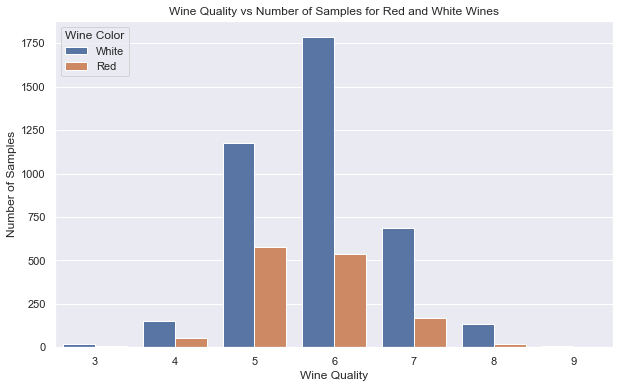

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'color' is the column for wine color (red/white)
plt.figure(figsize=(10,6))

# Create a count plot
sns.countplot(x='quality', hue='color', data=df)


# Set labels and title
plt.xlabel('Wine Quality')
plt.ylabel('Number of Samples')
plt.title('Wine Quality vs Number of Samples for Red and White Wines')

# Change the legend labels
plt.legend(title='Wine Color', labels=['White', 'Red'])

# Show the plot
plt.show()

The correlation matrix and the pairplot does not reveal any collinearity. The highest correlation between any two features was ‘free sulfur dioxide’ and ‘total sulfur dioxide’ at .72.

The 'color' feature has far greater correlation with the features than 'quality' has with any of the features

In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092,0.486253
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205,0.645335
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954,-0.183759
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830,-0.328695
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137,0.499517
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002,-0.465326
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296,-0.694229
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434,0.429377
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733,0.310919
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884,0.490364


<AxesSubplot:>

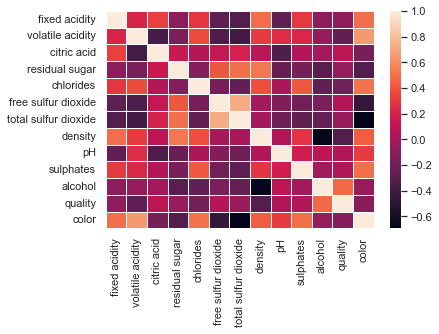

In [16]:
sns.heatmap(df.corr(), linewidth = .5)

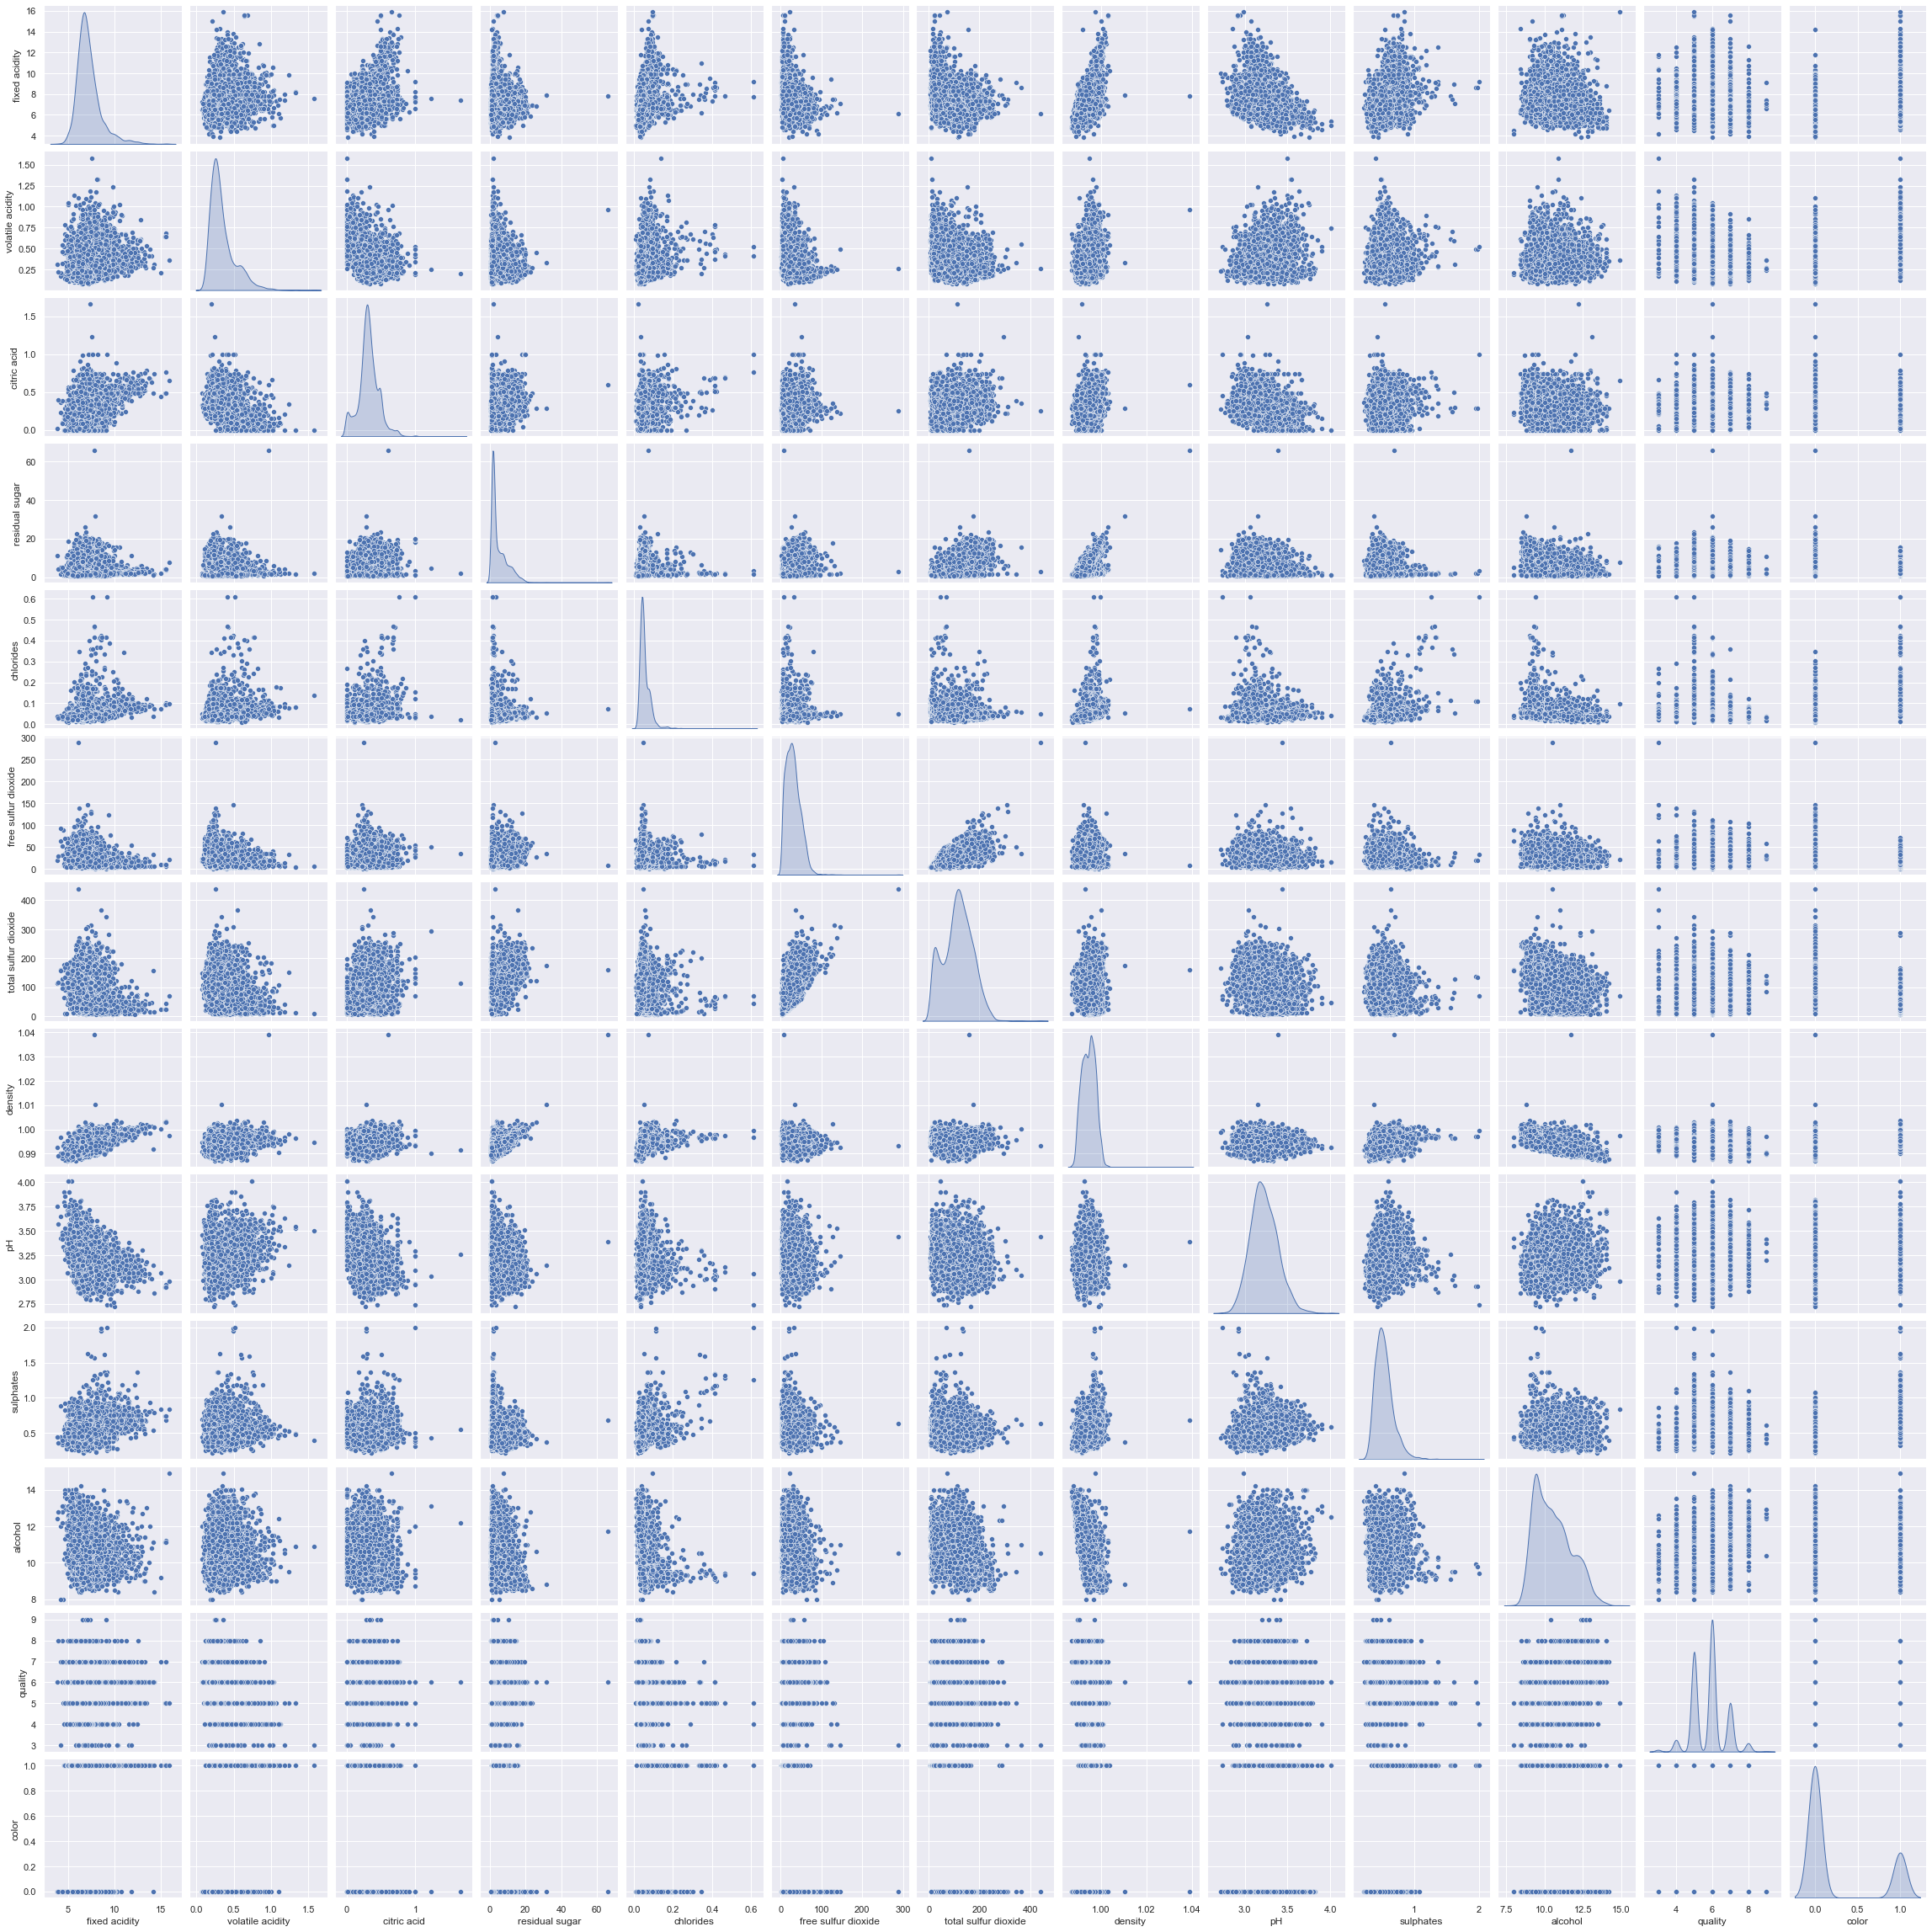

In [17]:
sns.pairplot(df, diag_kind = 'kde')

## Linear Regression for Wine Quality

In [18]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Find the absolute correlations with the target variable
target_corr = corr_matrix['quality'].abs()

# Find the feature with the maximum correlation (excluding the target itself)
max_corr_feature = target_corr.drop('quality').idxmax()
max_corr_value = target_corr[max_corr_feature]

print(f"Feature with max correlation: {max_corr_feature}, Correlation: {max_corr_value}")

# best guess is alcohol, highest correlation with quality

Feature with max correlation: alcohol, Correlation: 0.4694218379411509


### Forward step wise refinement

Forward stepwise refinement was used to iteratively add features to the model and observe which features had the largest impacts on r-squared squared values.  

In [19]:
#need to replace the column names with spaces with underscores so the formulas below will work

cols = df.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
print(cols)

df.columns = cols

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'color']


In [20]:
# create a training split to train the ordinary least square models

from sklearn.model_selection import train_test_split

train_quality, test_quality = train_test_split(df, test_size=0.5, random_state=0)

print(train_quality.shape,test_quality.shape)

(2660, 13) (2660, 13)


In [21]:
best = ['',0]
cols.remove('quality') #remove the target feature from the list to test
r2 = []
feat = []

for col in cols:
    model  = smf.ols(formula='quality~'+col, data=train_quality).fit()
    print(col, model.rsquared)
    if model.rsquared>best[1]:
        best = [col, model.rsquared]
print('best:',best)

fixed_acidity 0.005809980962047989
volatile_acidity 0.07590814189440986
citric_acid 0.0120484931691478
residual_sugar 0.004219905719770711
chlorides 0.039848315048308436
free_sulfur_dioxide 0.004379510323745395
total_sulfur_dioxide 0.002948320176812569
density 0.10856507458663678
pH 0.0021544765094799745
sulphates 0.0035225356426408228
alcohol 0.22031585779594742
color 0.008378292886972671
best: ['alcohol', 0.22031585779594742]


In [22]:
train_r2 = [0.21569576401581037]
feat = ['alcohol']
form = 'quality ~ alcohol'
forms = []
forms.append(form)

while len(forms) < len(cols):
    
    best = ['',0]
    
    for col in cols:
    
        if col in feat:
            None
        
        else:
            model  = smf.ols(formula=form + ' + ' + col, data=train_quality).fit()
            #print(col, model.rsquared)
            if model.rsquared>best[1]:
                best = [col, model.rsquared]
    
    form = form + ' + ' + best[0]
    forms.append(form)
    train_r2.append(best[1])
    feat.append(best[0])
    
print(train_r2)
print()

for form in forms:
    print(form)

[0.21569576401581037, 0.2834646132230111, 0.2962489012886539, 0.30652841091790095, 0.31053685709628254, 0.31411451547207236, 0.31929768708280415, 0.32225516412289534, 0.3278359119302525, 0.32940943799916644, 0.32959417441256755, 0.329744521195074]

quality ~ alcohol
quality ~ alcohol + volatile_acidity
quality ~ alcohol + volatile_acidity + color
quality ~ alcohol + volatile_acidity + color + free_sulfur_dioxide
quality ~ alcohol + volatile_acidity + color + free_sulfur_dioxide + sulphates
quality ~ alcohol + volatile_acidity + color + free_sulfur_dioxide + sulphates + residual_sugar
quality ~ alcohol + volatile_acidity + color + free_sulfur_dioxide + sulphates + residual_sugar + density
quality ~ alcohol + volatile_acidity + color + free_sulfur_dioxide + sulphates + residual_sugar + density + pH
quality ~ alcohol + volatile_acidity + color + free_sulfur_dioxide + sulphates + residual_sugar + density + pH + fixed_acidity
quality ~ alcohol + volatile_acidity + color + free_sulfur_dioxid

In [23]:
test_r2 = []
for form in forms:
    model  = smf.ols(formula=form, data=test_quality).fit()
    test_r2.append(model.rsquared)
    
print(test_r2)

[0.22062018592067123, 0.26819022325033404, 0.27088147809432905, 0.2762335923505286, 0.2830834080829828, 0.28610996842595915, 0.28740982264836057, 0.28911963486524106, 0.2925545909526255, 0.2954138875989787, 0.2954843829784153, 0.2974196013379262]


After calculating the r2 sqaured values for each formula using the training sample and the test sample we see that after 3 or 4 predictor there only minimal increase in the rsqaured values.

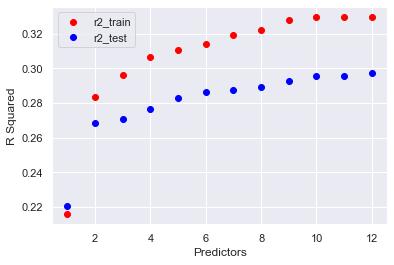

In [24]:
k = range(1,len(test_r2)+1)
plt.scatter(k, train_r2, color='red', label='r2_train')

plt.scatter(k, test_r2, color='blue', label='r2_test')
plt.xlabel('Predictors')
plt.ylabel('R Squared')
plt.legend()


While adding predictors beyond 4 doesn't improve the fit much, the model over all is not a great fit for the data.  Using the formular with all of the predictor to maximize the r-squared value, the model's has the highest r2 value of .3297 on the training data and .2974 on the test data.

### Leverage

Leverage: Observations with high leverage have the potential to disproportionately influence the regression results.

Studentized Residuals: These measure how much each residual deviates from the expected value, standardized by its standard deviation.

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     199.8
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:09:13   Log-Likelihood:                -5875.2
No. Observations:                5320   AIC:                         1.178e+04
Df Residuals:                    5307   BIC:                         1.186e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               99.6156 

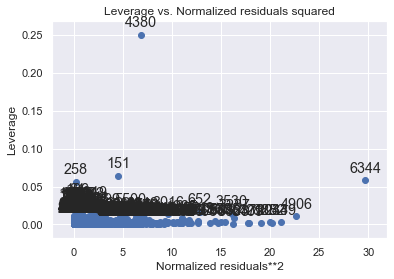

<Figure size 7200x3600 with 0 Axes>

In [25]:
form = forms[-1]
model = smf.ols(formula = form, data = df).fit()
print(model.summary())

sm.graphics.plot_leverage_resid2(model)
plt.figure(figsize=(100, 50)) 
plt.show()

### Identify and Clean

536 outlier identified with high leverage and/or residual values

536


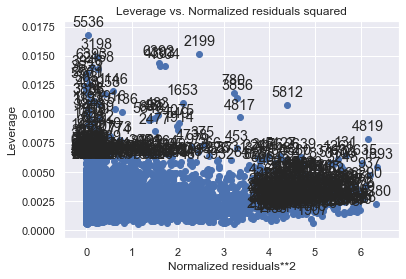

<Figure size 7200x3600 with 0 Axes>

In [26]:
# Step 1: Get the influence measures from the model
influence = model.get_influence()

# Step 2: Extract leverage and normalized residuals
leverage = influence.hat_matrix_diag  # Leverage values
normalized_residuals = influence.resid_studentized_internal  # Studentized (normalized) residuals

# Step 3: Set thresholds for high leverage and high residuals
n = len(df)  # Number of observations
k = len(model.params) - 1  # Number of predictors (excluding the intercept)
leverage_threshold = 2 * (k + 1) / n  # Typically, 2*(k+1)/n is used as a threshold
residual_threshold = 2  # Absolute value of normalized residuals > 2

# Step 4: Identify outliers (based on leverage and residual thresholds)
outliers = np.where((leverage > leverage_threshold) | (np.abs(normalized_residuals) > residual_threshold))[0]
print(len(outliers))

# Step 5: Remove the outliers from the dataset
df_cleaned = df.drop(df.index[outliers])

# Step 6: Optionally, refit the model without the outliers
model_final = smf.ols(formula=form, data=df_cleaned).fit()

sm.graphics.plot_leverage_resid2(model_final)
plt.figure(figsize=(100, 50)) 
plt.show()

### Final Model

In [27]:
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     262.2
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:09:16   Log-Likelihood:                -4297.2
No. Observations:                4784   AIC:                             8620.
Df Residuals:                    4771   BIC:                             8705.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              130.1862 

The final model summary shows that 'citric acid' may not be statistically significant but after removing it did not affect the r squared value. 

In [28]:
form_final = forms[-3] + ' + ' + 'chlorides'
print(form_final)

model_final = smf.ols(formula=form_final, data=df_cleaned).fit()
print()
print(model_final.rsquared)

quality ~ alcohol + volatile_acidity + color + free_sulfur_dioxide + sulphates + residual_sugar + density + pH + fixed_acidity + total_sulfur_dioxide + chlorides

0.3971496439440657


### Linear Regression for Wine Quality: Results and Analysis


After using forward step wise  refinementm find the outliers using the leverage and residuals, and then removing the variable with a p-value value the linear regression model resulted in a max r sqaured value of 0.39714.

The model was not able to fit the data very well. This may be because there was an imbalance in the distribution of the quality of wines.  Also the quality data gathered would have been highly subjective based the preferences on the people sampling the wine suggesting there a chance there no real trend in the quality of wines sampled.

## Classification for Wine Quality

### Feature Selection

The quality feature was very poorly correlated with the other features. To select feature for classification features that are moderately correlated with an absolute value of correlation greater .3.  Included are manually selected features that based of research wine connoisseurs find most important: 
* Alcohol - ‘Alcohol’
* Body - ‘Density’
* Sweetness - ‘Residual Sugar’
* Acidity - 'Volatile Acidity', 'Fixed Acidity' & 'pH'

In [29]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Find absolute correlations with the target variable
target_corr = corr_matrix['quality'].abs()

# Identify features with correlation greater than 0.3
relevant_features = target_corr[target_corr > 0.3].index.tolist()

important = ['alcohol','density','residual_sugar','volatile_acidity','fixed_acidity','pH']

for feat in important:
    if feat not in relevant_features: 
        relevant_features.append(feat)

print(relevant_features)

['density', 'alcohol', 'quality', 'residual_sugar', 'volatile_acidity', 'fixed_acidity', 'pH']


In [30]:
# drop irrelevant features
qdf = df[relevant_features]

qdf.head()

,density,alcohol,quality,residual_sugar,volatile_acidity,fixed_acidity,pH
0,0.9978,9.4,5,1.9,0.70,7.4,3.51
1,0.9968,9.8,5,2.6,0.88,7.8,3.20
2,0.9970,9.8,5,2.3,0.76,7.8,3.26
3,0.9980,9.8,6,1.9,0.28,11.2,3.16
5,0.9978,9.4,5,1.8,0.66,7.4,3.51


In [31]:
# create training splits

y = qdf[['quality']]
X = qdf.drop(columns=['quality'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape , X_test.shape, y_train.shape , y_test.shape

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

### K-Nearest Neighbors (KNN)

In [32]:
class KNN:

    def __init__(self, x_train, y_train, K):
        """
        Creates a kNN instance

        :param x_train: numpy array with shape (n_rows,1)- e.g. [[1,2],[3,4]]
        :param y_train: numpy array with shape (n_rows,)- e.g. [1,-1]
        :param K: The number of nearest points to consider in classification
        """
        
        # Import and build the BallTree on training features 
        from sklearn.neighbors import BallTree
        self.balltree = BallTree(x_train)
        
        # Cache training labels and parameter K 
        self.y_train = y_train
        self.K = K 
        
    def majority(self, neighbor_indices, neighbor_distances=None):
        """
        Given indices of nearest neighbors in training set, return the majority label. 
        Break ties by considering 1 fewer neighbor until a clear winner is found. 

        :param neighbor_indices: The indices of the K nearest neighbors in self.X_train 
        :param neighbor_distances: Corresponding distances from query point to K nearest neighbors. 
        """

        score = []
        
        indices = neighbor_indices[0].tolist()
        
        for i in indices:
            score.append(self.y_train[i])

                
        from scipy import stats

        def find_mode(lst):
            while lst:  # Keep trying as long as the list isn't empty
                try:
                    mode_result = stats.mode(lst)
                    return mode_result.mode[0]  # Return the mode if found
                except:
                    lst.pop()  # If there's a tie or another issue, pop an element and try again

            return None  # Return None if the list becomes empty
                  
        return find_mode(score)
        
    def classify(self, x):
        """
        Given a query point, return the predicted label 
        
        :param x: a query point stored as an ndarray  
        """
        neighbor_distance, neighbor_indices  = self.balltree.query([x],self.K)
        
        return self.majority(neighbor_indices)
        
    def predict(self, X):
        """
        Given an ndarray of query points, return yhat, an ndarray of predictions 

        :param X: an (m x p) dimension ndarray of points to predict labels for 
        """
        yhat = []
        
        for x in X:
            yhat.append(self.classify(x))
          
        yhat = np.array(yhat)
        
        return yhat

In [33]:
knn =  KNN(X_train, y_train, K=3)

y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.4473684210526316


At K = 13 the model correctly classifies the wine quality with an accuracy of 0.5216

The accuracy is 0.5216165413533834 at K=13 nearest neighbors


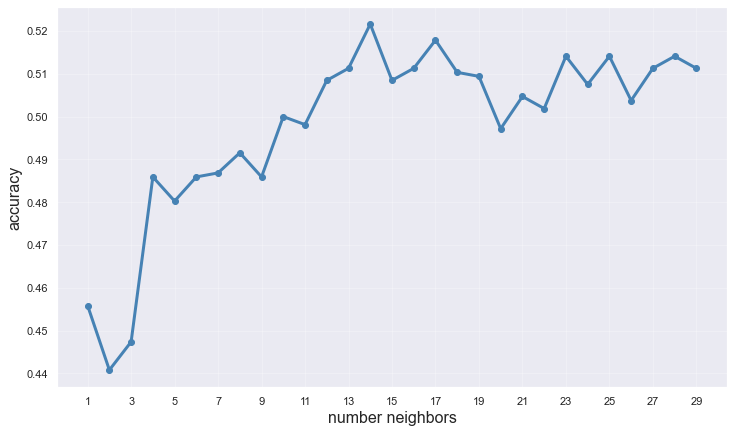

In [34]:
acc = []
allks = range(1,30)

# your code here
from sklearn.metrics import accuracy_score

for K in allks:
    knn =  KNN(X_train, y_train, K=K)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(allks, acc, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16)
plt.xticks(range(1,31,2))
ax.grid(alpha=0.25)

max_value = max(acc)
max_index = acc.index(max_value)
print(f"The accuracy is {max_value} at K={max_index} nearest neighbors")

In [35]:
knn =  KNN(X_train, y_train, K=13)

from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)

for row in range(0,6):
    print(sum(cm[row])-cm[row][row])

[[  0   0   2   4   0   0]
 [  0   0  24  19   1   0]
 [  0   1 223 138   7   0]
 [  0   0 131 272  39   1]
 [  0   0  21 101  49   3]
 [  0   0   1  20   7   0]]
6
44
146
171
125
28


### Decision Tree: Max Depth vs Max Leaf Nodes

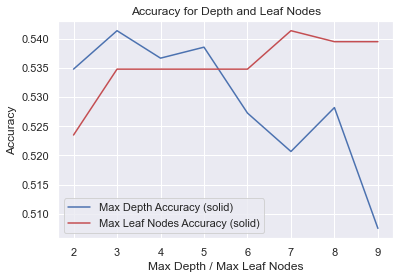

In [36]:
max_depth_acc = []
max_leaf_acc = []

# your code here
from sklearn.metrics import accuracy_score

for i in range(2,10):
    clf = DecisionTreeClassifier(max_depth = i, max_leaf_nodes = None, random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    max_depth_acc.append(accuracy)

for i in range(2,10):
    clf = DecisionTreeClassifier(max_depth = None, max_leaf_nodes = i, random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    max_leaf_acc.append(accuracy)
    
    
x = np.arange(2,10)

# Plot depth accuracy
plt.plot(x, max_depth_acc, 'b-', label='Max Depth Accuracy (solid)')  # Blue solid line

# Plot leaf accuracy
plt.plot(x, max_leaf_acc, 'r-', label='Max Leaf Nodes Accuracy (solid)')   # Red solid line

# Labels, title, and legend
plt.xlabel('Max Depth / Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy for Depth and Leaf Nodes')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

Using a decision tree classifier we get the best accuracy of 0.54135 use a max depth of 3 or 7 max leaf nodes

In [37]:
max_value1 = max(max_depth_acc)
max_index1 = max_depth_acc.index(max_value1)+2

# Print the results
print(f"The accuracy is {max_value1} at {max_index1} tree depth")

max_value2 = max(max_leaf_acc)
max_index2 = max_leaf_acc.index(max_value2)+2

print(f"The accuracy is {max_value2} at {max_index2} leaf nodes")

The accuracy is 0.5413533834586466 at 3 tree depth
The accuracy is 0.5413533834586466 at 7 leaf nodes


### Classification for Wine Quality: Results and Analysis

Using KNN with K = 13 the model correctly classifies the wine quality with an accuracy of 0.5216.  Using a decision tree classifier we get the best accuracy of 0.54135 use a max depth of 3 or 7 max leaf nodes.

## Classification for Wine Color

### Feature Selection

There are more features that are moderately correlated with the wine color. Features where there is a low correlation are dropped.

In [38]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Find the absolute correlations with the target variable
target_corr = corr_matrix['color'].abs()

# Find the feature with the maximum correlation (excluding the target itself)
max_corr_feature = target_corr.drop('color').idxmax()
max_corr_value = target_corr[max_corr_feature]

print(f"Feature with max correlation: {max_corr_feature}, Correlation: {max_corr_value}")

Feature with max correlation: total_sulfur_dioxide, Correlation: 0.6942287287949915


In [39]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Find absolute correlations with the target variable
target_corr = corr_matrix['color'].abs()

# Identify features with correlation less than 0.3
low_corr_features = target_corr[target_corr < 0.3].index

# Drop these features from the DataFrame
cdf = df.drop(columns=low_corr_features)

print(low_corr_features)

Index(['citric_acid', 'alcohol', 'quality'], dtype='object')


In [40]:
# create training splits

y = cdf[['color']]
X = cdf.drop(columns=['color'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape , X_test.shape, y_train.shape , y_test.shape

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

### K-Nearest Neighbors (KNN)

In [41]:
# reusing class from above
knn =  KNN(X_train, y_train, K=3)

y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(accuracy)
print(precision)
print(recall)

0.9154135338345865
0.859375
0.8029197080291971


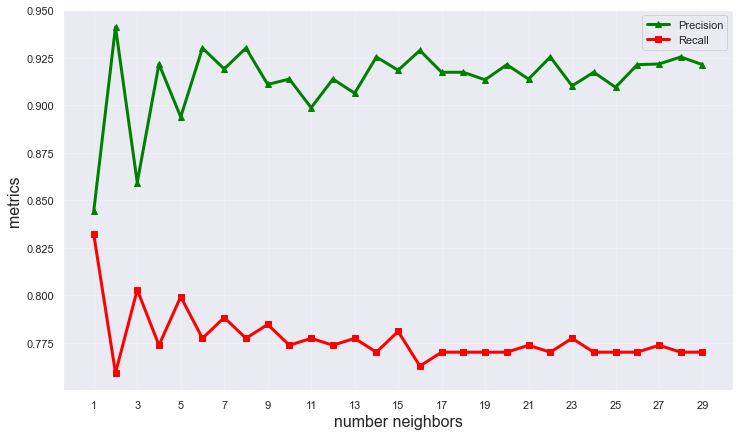

In [42]:
acc = []
pre = []
rec = []
allks = range(1,30)

# your code here
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

for K in allks:
    knn =  KNN(X_train, y_train, K=K)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc.append(accuracy)
    pre.append(precision)
    rec.append(recall)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,7))
#ax.plot(allks, acc, marker="o", color="steelblue", lw=3, label="Accuracy")
ax.plot(allks, pre, marker="^", color="green", lw=3, label="Precision")
ax.plot(allks, rec, marker="s", color="red", lw=3, label="Recall")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("metrics", fontsize=16)
plt.xticks(range(1, 31, 2))
ax.grid(alpha=0.25)

# Show the legend
ax.legend()

/Users/dstamps/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


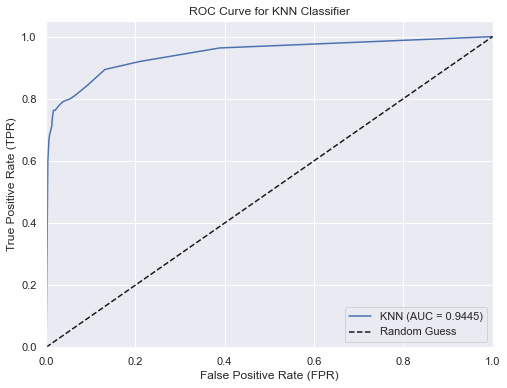

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=16)  
knn.fit(X_train, y_train)

y_pred_prob = knn.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.4f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Decision Tree: Max Depth vs Max Leaf Nodes

/var/folders/7y/kptcjk5d14zdt2yf3hbhqynh0000gn/T/ipykernel_60682/3090045202.py:37: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x, max_depth_precision, 'b--', label='Max Depth Precision (dashed)', linestyle='dashed')
/var/folders/7y/kptcjk5d14zdt2yf3hbhqynh0000gn/T/ipykernel_60682/3090045202.py:38: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x, max_leaf_precision, 'r--', label='Max Leaf Nodes Precision (dashed)', linestyle='dashed')
/var/folders/7y/kptcjk5d14zdt2yf3hbhqynh0000gn/T/ipykernel_60682/3090045202.py:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-." (-> linestyle='-.'). The keyword argument will take precedence.
  plt.plot(x, max_depth_recall, 'b

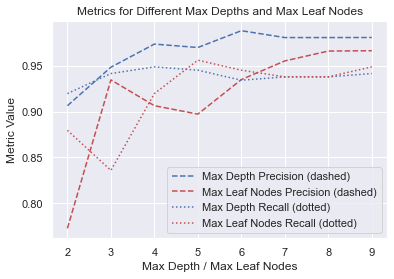

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#max_depth_acc = []
max_depth_precision = []
max_depth_recall = []

#max_leaf_acc = []
max_leaf_precision = []
max_leaf_recall = []

for i in range(2, 10):
    clf = DecisionTreeClassifier(max_depth=i, max_leaf_nodes=None, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    

    #max_depth_acc.append(accuracy_score(y_test, y_pred))
    max_depth_precision.append(precision_score(y_test, y_pred, average='binary'))  
    max_depth_recall.append(recall_score(y_test, y_pred, average='binary'))        

for i in range(2, 10):
    clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=i, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    #max_leaf_acc.append(accuracy_score(y_test, y_pred))
    max_leaf_precision.append(precision_score(y_test, y_pred, average='binary'))   
    max_leaf_recall.append(recall_score(y_test, y_pred, average='binary'))        

x = np.arange(2, 10)

# Plot accuracy for max depth and max leaf nodes
#plt.plot(x, max_depth_acc, 'b-', label='Max Depth Accuracy (solid)', linestyle='solid')
#plt.plot(x, max_leaf_acc, 'r-', label='Max Leaf Nodes Accuracy (solid)', linestyle='solid')

# Plot precision for max depth and max leaf nodes
plt.plot(x, max_depth_precision, 'b--', label='Max Depth Precision (dashed)', linestyle='dashed')
plt.plot(x, max_leaf_precision, 'r--', label='Max Leaf Nodes Precision (dashed)', linestyle='dashed')

# Plot recall for max depth and max leaf nodes
plt.plot(x, max_depth_recall, 'b-.', label='Max Depth Recall (dotted)', linestyle='dotted')
plt.plot(x, max_leaf_recall, 'r-.', label='Max Leaf Nodes Recall (dotted)', linestyle='dotted')

# Labels, title, and legend
plt.xlabel('Max Depth / Max Leaf Nodes')
plt.ylabel('Metric Value')
plt.title('Metrics for Different Max Depths and Max Leaf Nodes')
plt.legend()

# Display grid and show the plot
plt.grid(True)
plt.show()

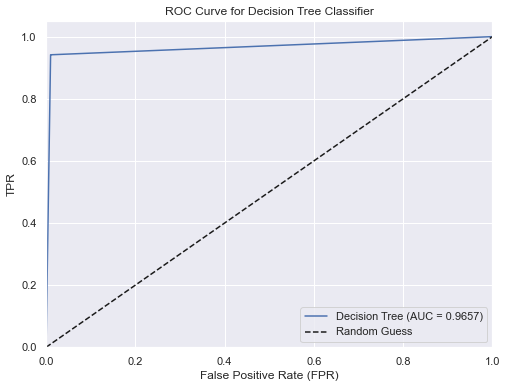

In [45]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred_prob = clf.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_score:.4f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('TPR')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Logistic Regression

The logistic function is a type of sigmoid function which has an 'S'-shape and 'squashes' its inputs to a value lying in the range [0,1]. Use this logistic function to perform a binary classification of the wine colors

In [46]:
def gen_logistic(x, w=1, b=0):
    """
    outputing the logistic output for an input x
    :param x: scalar or numpy array of shape (n_samples, n_features). If only one feature, it must have the shape of (n_samples,1).
    :param w: weight(s); either scalar or numpy array of shape (1, n_features)
    :param b: bias; either scalar or numpy array of shape (1,)
    returns y of shape (n_samples,)
    """    
    y = 0 
  
    if np.isscalar(x):
        x = np.array(x).reshape((1,1))
    if np.isscalar(w):
        w = np.array(w).reshape((1,1))
    if np.isscalar(b):
        b = np.array(b).reshape((1,1))  
    if b.shape==(1,):
        b = b.reshape((1,))  

    # your code here
    
    p = x.shape[1]
    if p > 1 :
        w = w.reshape(w.shape[1],1)
    
    z = np.dot(x,w) + b
    y = 1/(1 + np.exp(-z))
    
    return y.reshape(y.shape[0],)

In [47]:
# your code here
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(class_weight='balanced',solver='liblinear').fit(X_train,y_train)

/Users/dstamps/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The ROC curve below has an AUC of .995 and the ROC curve is well above the diagonal line indication this model is really good classifier

Text(0.7, 0.2, 'AUC-0.995')

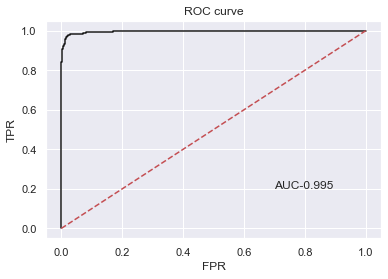

In [48]:
ypp = LogReg.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test,ypp[:,1])
auc = roc_auc_score(y_test,ypp[:,1])
plt.plot(fpr,tpr,'k-')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'r--')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.7,0.2,'AUC-'+"{:.3f}".format(auc))

In [49]:
w = LogReg.coef_
b = LogReg.intercept_

#w = w.reshape(w.shape[1],1)
#print(w.shape)

yp = gen_logistic(X_test,w,b)

y_pred = []

for i in yp:
    if i > .5:
        y_pred.append(1)
    else:
        y_pred.append(0)

accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
print(accuracy_lr)
print(precision_lr)
print(recall_lr)

0.9774436090225563
0.9370629370629371
0.9781021897810219


### Classification for Wine Color: Results and Analysis

KNN AUC = .9445
Decision Tree AUC = .9657
Logistic Regression = .995

## Discussion and Conclusion

### Wine Quality

Wine quality is rated on a scale from 0 to 10, but most of the ratings are between 3 and 8, creating an imbalanced and relatively small range. And then most of those data points are between 5 and 7. This means the target variable is ordinal (it has an inherent order), but it is often treated as either a continuous variable for regression or discrete labels for classification. Neither approach may fully capture the subtle nature of the data

Linear regression assumes the target variable is continuous and can take any value, but wine quality is rated as discrete integers (3, 4, 5, etc.), which may violate the assumptions of linear regression.

Classification models (e.g., logistic regression, decision trees) might treat the problem as predicting discrete classes, but these models typically handle categorical targets and may struggle to deal with the ordinal nature of the quality ratings (where the difference between adjacent ratings is meaningful).

Also the wine quality score is based on human tasters' assessments, which introduces subjectivity into the ratings. Different tasters might rate the same wine differently, and this variability adds noise to the data. This inconsistency makes it hard for models to find clear patterns or relationships between the wine's physicochemical properties and the subjective quality rating.

### Color

Wine color is a binary variable, with only two possible classes: red or white. Binary classification problems are easier to model compared to multi-class or continuous regression problems because the decision boundary between two classes is simpler to define.
Many machine learning models, such as logistic regression, decision trees, and K-Nearest Neighbors (KNN), are well-suited for binary classification.

Also the two different color wines have distinct checmical properties. These distinct differences make it easier for classification algorithms to distinguish between the two classes based on these physicochemical features.